In [39]:
from sklearn.datasets import load_iris

iris = load_iris()
print(f'classes: {iris.target_names}')
print(f'attributes: {iris.feature_names}')
M = len(iris.data)
print(f'Number of instances: {M}')

classes: ['setosa' 'versicolor' 'virginica']
attributes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of instances: 150


# Algorithm 1R - Classification rules

In [40]:
import pandas as pd
import numpy as np

def find_most_frequent_classes(class_index):
    class_frequencies = {}
    for instance in zip(iris.data, iris.target):
        if instance[0][class_index] in class_frequencies:
            class_frequencies[instance[0][class_index]][instance[1]] = class_frequencies[instance[0][class_index]][instance[1]] + 1
            class_frequencies[instance[0][class_index]][3] = np.argmax(class_frequencies[instance[0][class_index]][0:3])
        else:
            new_freq = {
                    instance[0][class_index]: [0, 0, 0, 0]
                }
            new_freq[instance[0][class_index]][instance[1]] = new_freq[instance[0][class_index]][instance[1]] + 1
            new_freq[instance[0][class_index]][3] = np.argmax(new_freq[instance[0][class_index]][0:3])
            class_frequencies.update(new_freq)
    df_freq = pd.DataFrame.from_dict(class_frequencies).transpose().sort_index()
    return df_freq.rename(columns={3: "most_frequent"})

In [41]:
df_class_0 = find_most_frequent_classes(0)
df_class_0

,0,1,2,most_frequent
4.3,1,0,0,0
4.4,3,0,0,0
4.5,1,0,0,0
4.6,4,0,0,0
4.7,2,0,0,0
4.8,5,0,0,0
4.9,4,1,1,0
5.0,8,2,0,0
5.1,8,1,0,0
5.2,3,1,0,0


In [42]:
df_class_1 = find_most_frequent_classes(1)
df_class_1

,0,1,2,most_frequent
2.0,0,1,0,1
2.2,0,2,1,1
2.3,1,3,0,1
2.4,0,3,0,1
2.5,0,4,4,1
2.6,0,3,2,1
2.7,0,5,4,1
2.8,0,6,8,2
2.9,1,7,2,1
3.0,6,8,12,2


In [43]:
row = 0
column = 0
matrix = np.zeros((len(df_class_1), len(df_class_0)))
import random

for class_0_index in df_class_0.index:
    class_0_element = df_class_0.loc[class_0_index]
    row = 0
    for class_1_index in df_class_1.index:
        class_1_element = df_class_1.loc[class_1_index]
        max_class_0 = class_0_element['most_frequent']
        max_class_1 = class_1_element['most_frequent']
        matrix[row][column] =  max_class_0 if class_0_element[max_class_0] > class_1_element[max_class_1] else max_class_1
        matrix[row][column] =  random.randint(0, 1) if class_0_element[max_class_0] == class_1_element[max_class_1] else matrix[row][column]
        row = row + 1
    column = column + 1

The column labels are the feature 0 values, and the row indexes are the feature 1 values

In [44]:
df_matrix_rules = pd.DataFrame(matrix, columns = df_class_0.index.values.tolist()).set_index(pd.Index(df_class_1.index.values.tolist()))
df_matrix_rules

,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0
2.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
2.3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2.4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2.5,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2.6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2.8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [45]:
def predict_class(instance):
    return df_matrix_rules.loc[instance[1]][instance[0]].astype(int)

In [46]:
from sklearn import metrics

y_pred_list = []
for instance in iris.data:
    y_pred = predict_class(instance)
    y_pred_list.append(y_pred)

score = 0
for output in zip(y_pred_list, iris.target.tolist()):
    score = (score + 1) if output[0] == output[1] else score
score = score / len(iris.data)
print(f'Score: {score}')
print(f'Resubstitution error: {1-score}')
print(f'Accuracy: {metrics.accuracy_score(iris.target.tolist(), y_pred_list)}')

Score: 0.5866666666666667
Resubstitution error: 0.41333333333333333
Accuracy: 0.5866666666666667


# Decision Tree Classifier

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

iris = load_iris()
print(f'Classes: {iris.target_names}')

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

decision_tree = tree.DecisionTreeClassifier(random_state = 0)

decision_tree.fit(X_train, y_train)

Classes: ['setosa' 'versicolor' 'virginica']


DecisionTreeClassifier(random_state=0)

Score: 0.9736842105263158
Training score: 1.0
Test score: 0.9736842105263158
Accuracy: 0.9736842105263158
Precision per class: [1.  1.  0.9]
Recall per class: [1.     0.9375 1.    ]
F1-score per class: [1.         0.96774194 0.94736842]


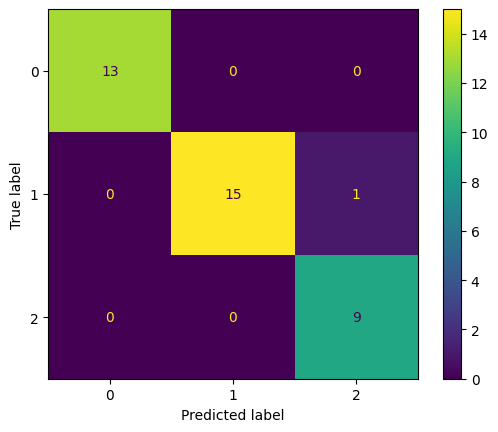

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = decision_tree.predict(X_test)
score = 0
for output in zip(y_pred, y_test):
    score = (score + 1) if output[0] == output[1] else score
score = score / len(y_test)
print(f'Score: {score}')

print(f'Training score: {decision_tree.score(X_train, y_train)}')
print(f'Test score: {decision_tree.score(X_test, y_test)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision per class: {metrics.precision_score(y_test, y_pred, average = None)}')
print(f'Recall per class: {metrics.recall_score(y_test, y_pred, average = None)}')
print(f'F1-score per class: {metrics.f1_score(y_test, y_pred, average = None)}')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()
plt.show()

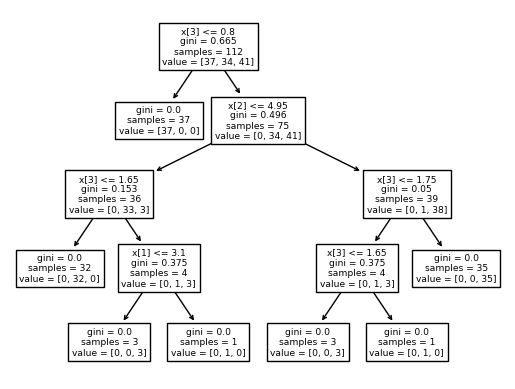

In [59]:
decision_path = decision_tree.decision_path(iris.data)
tree.plot_tree(decision_tree)
plt.show()